In [1]:
%matplotlib inline

In [2]:
from nilearn import datasets

# Fetch 10 subjects from the ADHD dataset
adhd_dataset = datasets.fetch_adhd(n_subjects=10)

# Get the list of niftii files and separate it into two 7 subject folds
func_filenames = adhd_dataset.func
func_filenames_one, func_filenames_two = func_filenames[:7], func_filenames[3:]

In [3]:
from nilearn.decomposition import DictLearning, CanICA

n_components = 10

In [4]:
dict_learning = DictLearning(n_components=n_components,
                             memory="nilearn_cache", memory_level=2,
                             random_state=0, n_epochs=1)

In [5]:
canica = CanICA(n_components=n_components,
                memory="nilearn_cache", memory_level=2,
                threshold=3., n_init=1)

/usr/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/usr/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


Fitting DictionaryLearning, first split
Fitting DictionaryLearning, second split

/usr/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/usr/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/usr/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/usr/lib/python2.7/site-pack


Fitting CanICA, first split
Fitting CanICA, second split


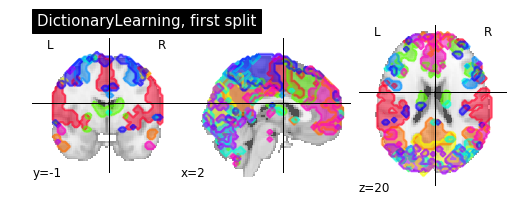

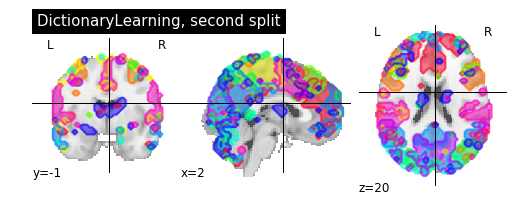

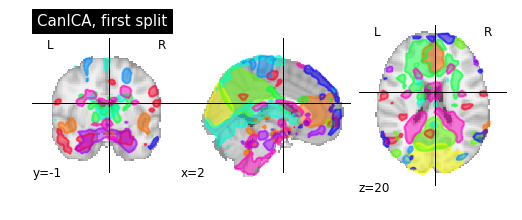

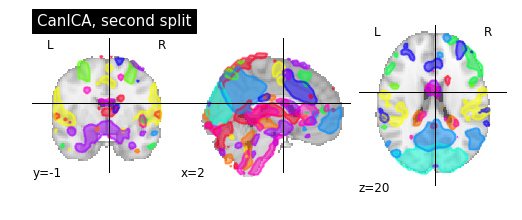

In [7]:
from nilearn.plotting import plot_prob_atlas
from itertools import product 

# Create arrays for looping through estimators and folds
estimators = [dict_learning, canica]
names = {dict_learning: 'DictionaryLearning', canica: 'CanICA'}
folds = [[func_filenames_one, ', first split'], 
         [func_filenames_two, ', second split']]

# Create an array to store the resulting atlases
components_imgs = []

for estimator, fold in product(estimators, folds):
    print("Fitting %s" %(names[estimator]+fold[1]))
    
    # Fit the estimator on the fold
    estimator.fit(fold[0])
    # Decomposition estimator embeds their own masker
    masker = estimator.masker_
    # Drop output maps to a Nifti file
    components_img = masker.inverse_transform(estimator.components_)
    components_imgs.append(components_img)
    
    # Plot the resulting atlas
    plot_prob_atlas(components_img, view_type="filled_contours",
                    title=names[estimator]+fold[1] , colorbar=False)

In [9]:
from nilearn.connectome.jaccard_index import jaccard_index

# Compute the Jaccard similarity indexes for the Dictionary Learning
# and CanICA models across both folds
dict_similarity = jaccard_index(components_imgs[0], components_imgs[1])
canica_similarity = jaccard_index(components_imgs[2], components_imgs[3])

print("Dictionary Learning similarity coefficient: %.4f" %dict_similarity)
print("Canonical ICA similarity coefficient: %.4f" %canica_similarity)

Dictionary Learning similarity coefficient: 0.0199
Canonical ICA similarity coefficient: 0.1165
